In [2]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 946s 6us/step


In [4]:
NUM_CLASSES = 10

In [5]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [6]:
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [7]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential([
Dense(200, activation = 'relu', input_shape=(32, 32, 3)),
Flatten(),
Dense(150, activation = 'relu'),
Dense(10, activation = 'softmax'),
])

In [9]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model
input_layer = Input(shape=(32,32, 3))
x = Flatten()(input_layer)
x = Dense(units=200, activation = 'relu')(x)
x = Dense(units=150, activation = 'relu')(x)
output_layer = Dense(units=10, activation = 'softmax')(x)
model = Model(input_layer, output_layer)

In [12]:

x = Dense(units=200, activation = 'relu')(x)
from keras.optimizers import Adam
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt,
metrics=['accuracy'])

In [13]:
model.fit(x_train
, y_train
, batch_size = 32
, epochs = 10
, shuffle = True
)

Epoch 1/10
1563/1563 [==============================] - 18s 5ms/step - loss: 1.9603 - accuracy: 0.2902
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6893 - accuracy: 0.3940
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5990 - accuracy: 0.4313
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5418 - accuracy: 0.4510
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5034 - accuracy: 0.4604
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4594 - accuracy: 0.4811
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4302 - accuracy: 0.4900
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4117 - accuracy: 0.4995
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3724 - accuracy: 0.5137
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.35

In [14]:
model.evaluate(x_test, y_test)
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog'
, 'frog', 'horse', 'ship', 'truck'])
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 1s 2ms/step - loss: 1.4427 - accuracy: 0.4860


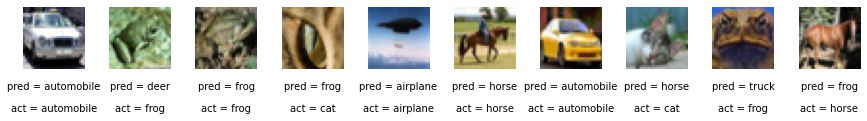

In [16]:
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)